In [128]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [129]:
import cf_helper_2 as cf_helper
import matplotlib.pyplot as plt
import importlib
%matplotlib notebook
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

importlib.reload(cf_helper)

<module 'cf_helper_2' from '/Users/hordia/dev/ML/course-ITBA-DL/course-notebooks-labs/kaggle-02-movie-classification/datos-estructurados-itba-2020/cf_helper_2.py'>

In [130]:
%matplotlib inline

In [131]:
# Load train and test data from CSV files
base_data = pd.read_csv('train.csv', sep='\t') # train data, luego se splittea en train y validation
test_data = pd.read_csv('test.csv', sep=',') # final test


In [132]:
base_data.head()

,userId,movieId,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [133]:
base_data.drop(columns=['timestamp'], inplace=True)
base_data.head()

,userId,movieId,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [134]:
base_data.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [135]:
test_data.isnull().sum()

Id         0
userId     0
movieId    0
rating     0
dtype: int64

In [136]:
movies = pd.read_csv('item.csv', sep='|')

In [137]:
movies.head()

,movieId,movieTitle,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [138]:
# merging both the datasets on 'movieId' column
rating = base_data
movie_rating = pd.merge(left=rating,right=movies,on='movieId')

In [139]:
movie_rating.head()

,userId,movieId,rating,movieTitle,release date,video release date,IMDb URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,4,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,1,3,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,1,5,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
movie_rating.isnull().sum()

userId                    0
movieId                   0
rating                    0
movieTitle                0
release date              3
video release date    80000
IMDb URL                  7
unknown                   0
Action                    0
Adventure                 0
Animation                 0
Children's                0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Fantasy                   0
Film-Noir                 0
Horror                    0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Thriller                  0
War                       0
Western                   0
dtype: int64

In [141]:
# grouping the movies based on average rating
average_rating_movies = movie_rating.groupby('movieTitle')['rating'].mean().sort_values(ascending=False)

In [142]:
average_rating_movies.head(10)

movieTitle
Entertaining Angels: The Dorothy Day Story (1996)    5.000000
Santa with Muscles (1996)                            5.000000
They Made Me a Criminal (1939)                       5.000000
Saint of Fort Washington, The (1993)                 5.000000
Someone Else's America (1995)                        5.000000
Star Kid (1997)                                      5.000000
Marlene Dietrich: Shadow and Light (1996)            5.000000
Prefontaine (1997)                                   5.000000
Pather Panchali (1955)                               4.714286
Faust (1994)                                         4.666667
Name: rating, dtype: float64

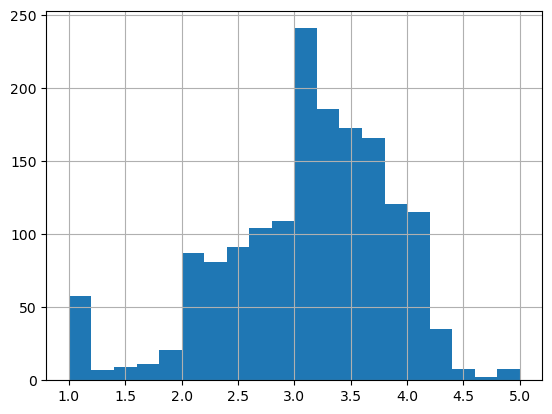

In [143]:
average_rating_movies.hist(bins=20)
plt.show()

# plt.hist( average_rating_movies, bins=20, color='blue', alpha=0.7 )
# plt.show()

#(estos histogramas requieren línea arriba %matplotlib inline para ejecutar en la notebook)

In [144]:
# grouping the movies based on count of users who rated the movies
count_userid = movie_rating.groupby('movieTitle')['userId'].count().sort_values(ascending=False)
count_userid

movieTitle
Star Wars (1977)                                484
Return of the Jedi (1983)                       422
Contact (1997)                                  402
Fargo (1996)                                    395
Liar Liar (1997)                                394
                                               ... 
I Like It Like That (1994)                        1
Shadow of Angels (Schatten der Engel) (1976)      1
Hush (1998)                                       1
Hungarian Fairy Tale, A (1987)                    1
� k�ldum klaka (Cold Fever) (1994)                1
Name: userId, Length: 1633, dtype: int64

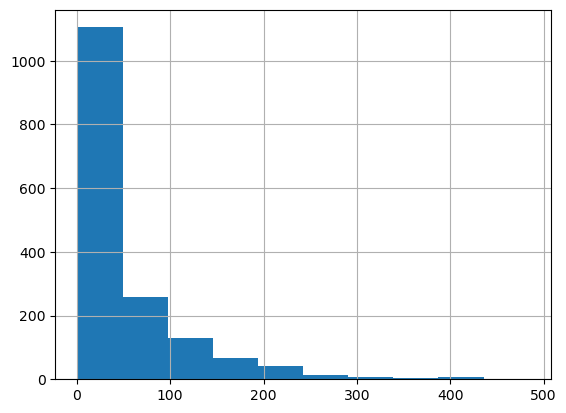

In [145]:
count_userid.hist()


plt.show()

In [146]:
#IMPORTANTE, agrego yo para que después sea "efectivo" el split entre train,validator

# Shuffle the rows of the DataFrame
shuffled_df = base_data.sample(frac=1, random_state=42)

shuffled_df.head()

base_data = shuffled_df

In [147]:
len(base_data)

80000

In [148]:
n_users = base_data["userId"].unique().shape[0]
print(n_users)
n_items = base_data["movieId"].unique().shape[0]
print(n_items)

943
1650


In [149]:
movie_items = base_data["movieId"].unique()
movie_items

array([1115,  317,  717, ..., 1625, 1548, 1122])

In [150]:
max(movie_items)

1682

In [151]:
# test data
test_data.head()

,Id,userId,movieId,rating
0,0,1,6,3
1,1,1,10,3
2,2,1,12,3
3,3,1,14,2
4,4,1,17,4


In [152]:
# Rename the columns of test_data
#test_data.rename(columns={'userId': 'userOd', 'movieId': 'movieId', 'rating': 'rating'}, inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [153]:
test_data.head()

,userId,movieId,rating
0,1,6,3
1,1,10,3
2,1,12,3
3,1,14,2
4,1,17,4


Si asumo que los test data que tienen rating 0, son los que tengo que estimar, los remuevo en este paso, entreno y luego los completo

In [154]:
# Eliminar filas con rating igual a 0
df = test_data[test_data['rating'] != 0]
print(len(df))
test_data = df

15958


A diferencia del otro dataset, todos los items no existen y tengo que usar

    n_items = np.max(dataframe[itemIndexTag].unique()) # cant de peliculas únicas (items)
    que toma el máximo y por lo tanto en la matriz me van a quedar columnas vacias?

en lugar de: (que tomaba el largo del vector, items únicos)
    #n_items = dataframe[itemIndexTag].unique().shape[0] # cant de peliculas únicas (items)

    una opción puede ser hacer una función de correspondencia entre items reales y los que uso en la matriz??
    

In [155]:
""" Incluye el split en train y test. El input es todo el dataset """
# Este split lo preciso para el primer dataset que es único. Si ya tengo separado en dos archivos puedo usar dos funciones
def get_user_item_matrix(dataframe, userIndexTag, itemIndexTag, ratingTag, test_size_ratio, base_1 = False):
    first = 0
    if base_1:
        first = 1
    
    n_users = dataframe[userIndexTag].unique().shape[0] # cant de usuarios únicos
    # n_items = dataframe[itemIndexTag].unique().shape[0] # cant de peliculas únicas (items)
    n_items = np.max(dataframe[itemIndexTag].unique()) # cant de peliculas únicas (items)
    print(n_users)
    print(n_items)
    
    train_data, test_data = train_test_split(dataframe, test_size=test_size_ratio)

    R = np.zeros((n_users, n_items))
    T = np.zeros((n_users, n_items))
    print(R.shape)

    # train_data iter
    for index, line in train_data.iterrows():
        R[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]

    # test_data iter
    for index, line in test_data.iterrows():
        T[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]
    print(T.shape)
    return R,T


In [156]:
shuffled_df.head()

,userId,movieId,rating
47044,608,1115,4
44295,577,317,5
74783,891,717,4
70975,862,825,5
46645,606,82,5


In [157]:
# Este split lo preciso para el primer dataset que es único. Si ya tengo separado en dos archivos puedo usar dos funciones
R_train, R_test = get_user_item_matrix(
    base_data,
    'userId',
    'movieId',
    'rating',
    # test_size_ratio=.25,
    # test_size_ratio=.1,
    test_size_ratio=.2,
    base_1 = True)

943
1682
(943, 1682)
(943, 1682)


In [158]:
""" 
    El input es todo el dataset de train y el de test por separado, no hay split 
    para competencia de kaggle (que te da el csv de test por separado)
    ambos dataset deben coincidir con el mismo tag
"""
def get_user_item_matrix_no_split(train_data, test_data, userIndexTag, itemIndexTag, ratingTag, base_1 = False):
    first = 0
    if base_1:
        first = 1
 
    # Assuming you have df1 and df2 DataFrames
    # Concatenate vertically (along rows)
    concatenated_df = pd.concat([train_data, test_data], ignore_index=True)

    # Concatenate horizontally (along columns)
    # concatenated_df = pd.concat([train_data, test_data], axis=1)


    # calculados sobre el dataframe de train
    n_users = concatenated_df[userIndexTag].unique().shape[0] # cant de usuarios únicos
    # n_items = concatenated_df[itemIndexTag].unique().shape[0] # cant de peliculas únicas (items)
    n_items = np.max(concatenated_df[itemIndexTag].unique()) # cant de peliculas únicas (items)
    print(n_users)
    print(n_items)
    
    R = np.zeros((n_users, n_items))
    T = np.zeros((n_users, n_items))
    print(R.shape)

    # train_data iter
    for index, line in train_data.iterrows():
        R[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]

    # test_data iter
    for index, line in test_data.iterrows():
        T[line[userIndexTag] - first, line[itemIndexTag] - first] = line[ratingTag]
    print(T.shape)
    return R,T


In [159]:
len(base_data)

80000

In [160]:
len(test_data)

15958

In [163]:
concatenated_df = pd.concat([base_data, test_data], ignore_index=True)
len(concatenated_df)

shuffled_df = concatenated_df.sample(frac=1, random_state=42)

shuffled_df.head()

concatenated_df = shuffled_df
# concatenated_df.drop(columns=['Id'], inplace=True)

In [162]:
concatenated_df.head()

,userId,movieId,rating
51373,505,117,4
14668,804,233,4
50330,848,512,5
90109,276,318,3
17913,14,12,5


In [164]:
concatenated_df.to_csv('train_data_expanded.csv', index=False) # ya tiene una 

In [165]:
print(len(concatenated_df))

95958


In [63]:
# (evitar) si hago esto va a generar un nuevo split diferente al que me habian pasado 
R_train, R_test = get_user_item_matrix(
    concatenated_df,
    'userId',
    'movieId',
    'rating',
    test_size_ratio=.25,
    base_1 = True)

943
1682
(943, 1682)
(943, 1682)


In [64]:
%%skip
# sin split, se pasan los dataset previos (de competencia kaggle) 
R_train, R_test = get_user_item_matrix_no_split(
    base_data,
    test_data,
    'userId',
    'movieId',
    'rating',
    base_1 = True)

UsageError: Cell magic `%%skip` not found.


In [65]:
# ok acá se eliminan las muestras que dan cero (elimino los índices con cero que es no rating, el que tengo que predecir)
# importante
R_rated_indexes_train = R_train.nonzero()
R_rated_indexes_test = R_test.nonzero()

In [66]:
I_train = R_train.copy()
T_test = R_test.copy()
I_train[I_train==0] = 0
I_train[I_train!=0] = 1
T_test[T_test==0] = 0
T_test[T_test!=0] = 1

In [67]:
I_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [68]:
perc_points = 100
relevant_rate = 5
relevant_rate = 1 #like

In [69]:
#def get_estimated_R(SM, R_tr, R_ts, R_rated_indexes_tr, R_rated_indexes_ts, k = -1, means = 0,divide_by_weights_sum = True, count_diag = False, relevant_rate = 1, perc_points = 100):

k_val = -1
# k_val = 1


def get_estimated_R(SM, R_tr, R_ts, R_rated_indexes_tr, R_rated_indexes_ts, k = k_val, means = 0,divide_by_weights_sum = True, count_diag = False, relevant_rate = relevant_rate, perc_points = 100):
    if k==-1:
        R_est = cf_helper.predictions(R_tr, SM, divide_by_weights_sum= divide_by_weights_sum, count_diag = count_diag, means = means)
    else:
        R_est = cf_helper.predictions_K_neighbours(R_tr, SM, k=k, means = means, divide_by_weights_sum= divide_by_weights_sum, count_diag = count_diag)
    rmse_tr= cf_helper.rmse(R_tr,R_est)
    rmse_ts = cf_helper.rmse(R_ts, R_est)
    perc = cf_helper.get_percentiles(R_ts, R_est, like = relevant_rate, points = perc_points, number_of_random_items = 500)
    print(rmse_tr,rmse_ts)
    return R_est, perc, rmse_ts

In [70]:
SM_pearson2, user_means2 = cf_helper.getPearsonSimilarityMatrix_non_zeros(R_train)

In [71]:
SM_jaccard, _ = cf_helper.calcultaSimilarityMatrix(R_train, dist_type ='jaccard_with_negatives')
SM_pearson, user_means = cf_helper.calcultaSimilarityMatrix(R_train, dist_type ='pearson')
SM_cosine, _ = cf_helper.calcultaSimilarityMatrix(R_train, dist_type ='cosine')

In [72]:
R_train.shape

(943, 1682)

In [73]:
R_test.shape

(943, 1682)

In [74]:
R_est_pearson2, perc_pearson2, rmse_pearson2 = get_estimated_R(SM_pearson2, R_train, R_test, R_rated_indexes_train, 
                                                               R_rated_indexes_test, 
                                                               means = user_means2, perc_points = perc_points, relevant_rate = relevant_rate)

1.5824713178079168 1.6323400311824352


In [75]:
R_est_pearson, perc_pearson, rmse_pearson = get_estimated_R(SM_pearson, R_train, R_test, R_rated_indexes_train, 
                                                            R_rated_indexes_test, means = user_means, 
                                                            perc_points = perc_points, relevant_rate = relevant_rate)

2.833599374524651 2.887849403124402


In [76]:
R_est_cosine, perc_cosine, rmse_cosine = get_estimated_R(SM_cosine, R_train, R_test, R_rated_indexes_train, R_rated_indexes_test, perc_points = perc_points, relevant_rate = relevant_rate, means = 0)

2.929988053221676 2.966348766479602


In [77]:
R_est_jaccard, perc_jaccard, rmse_jaccard = get_estimated_R(SM_jaccard,R_train, R_test, R_rated_indexes_train, R_rated_indexes_test, perc_points = perc_points, relevant_rate = relevant_rate)

2.8917522262876725 2.9319133789068625


In [78]:
mu_train = R_train[R_rated_indexes_train].mean()

percentiles_train_media = cf_helper.get_percentiles(R_test, mu_train*np.ones(R_train.shape), like = relevant_rate)

In [79]:
def get_biased_data(R_tr, bias):
    R_tr_b = R_tr.copy()
    R_tr_b[R_tr==0] = bias
    return R_tr_b

In [80]:
R_train_biased = get_biased_data(R_train, mu_train)

SM_biased, user_means_biased = cf_helper.calcultaSimilarityMatrix(R_train_biased, dist_type ='pearson')

R_est_biased, perc_biased, rmse_biased = get_estimated_R(SM_biased, R_train_biased, R_test, R_rated_indexes_train, R_rated_indexes_test, means=user_means_biased, relevant_rate = relevant_rate)

0.23721781400773193 1.1458019723338055


/Users/hordia/dev/ML/course-ITBA-DL/course-notebooks-labs/kaggle-02-movie-classification/datos-estructurados-itba-2020/cf_helper_2.py:537: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


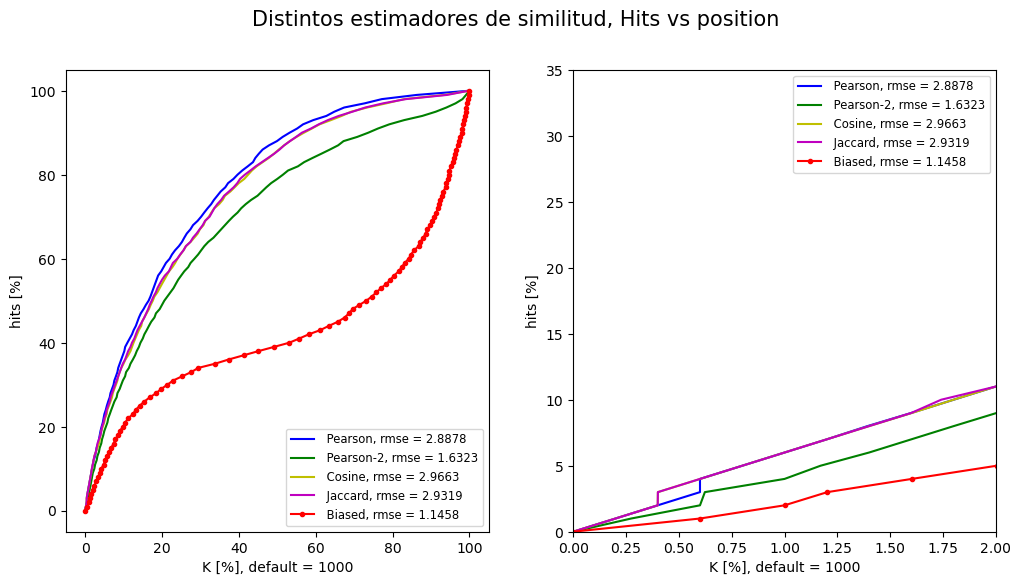

In [81]:
%matplotlib inline
perc_basis_vect = [perc_pearson, perc_pearson2,perc_cosine, perc_jaccard, perc_biased]
rmse_basis_vect = [rmse_pearson, rmse_pearson2,rmse_cosine, rmse_jaccard, rmse_biased]
names_basis_vect = ['Pearson','Pearson-2','Cosine','Jaccard', 'Biased']

cf_helper.plot_percentiles(names_basis_vect, rmse_basis_vect, perc_basis_vect,
                 parameter_name ='', title= 'Distintos estimadores de similitud, Hits vs position',
                 featured_idx = 4, featured_text = 'Biased')


 Ejemplo: si k=2 y hits=30 
 El 30% de los items relevantes se encuentran dentro de los primeros 20 items (1000 * k/100)


/var/folders/zf/fg68pxbn0ys0ljbx0b3pmxrw0000gq/T/ipykernel_68442/3592684946.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


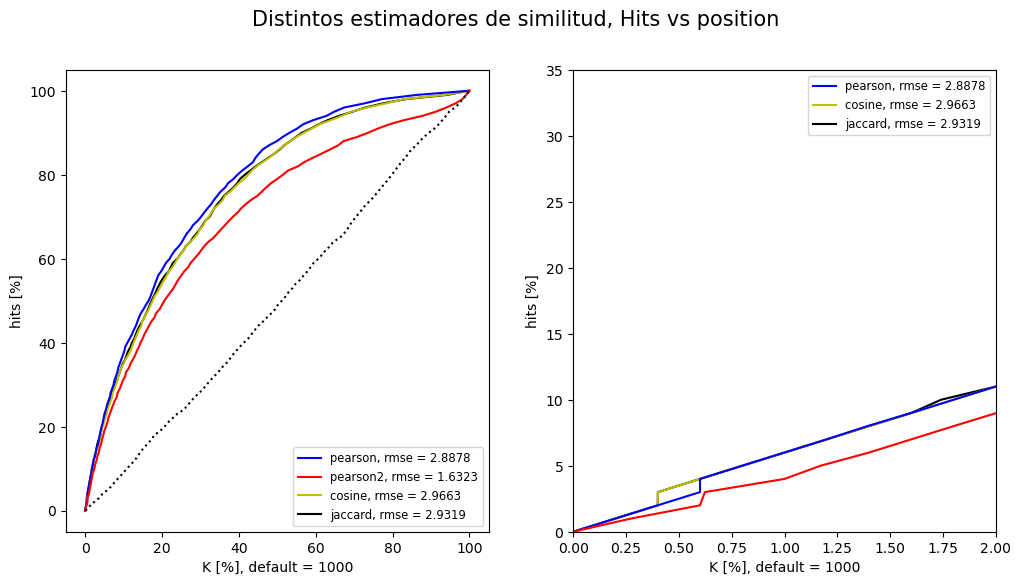

In [82]:
f, ([ax1, ax2]) = plt.subplots(1,2, sharex=False, sharey=False, figsize=(12, 6)) #, figsize=(10, 10)

plt_jaccard, = ax1.plot(*perc_jaccard, color = 'k', label = 'jaccard, rmse = %.4f'%rmse_jaccard)
plt_cosine, = ax1.plot(*perc_cosine, color = 'y', label = 'cosine, rmse = %.4f'%rmse_cosine)
plt_pearson, = ax1.plot(*perc_pearson, color = 'b', label = 'pearson, rmse = %.4f'%rmse_pearson)
plt_pearson2, = ax1.plot(*perc_pearson2, color = 'r', label = 'pearson2, rmse = %.4f'%rmse_pearson2)

ax1.plot(*percentiles_train_media, linestyle = ":", color = 'k')

ax1.legend(handles=[plt_pearson, plt_pearson2, plt_cosine, plt_jaccard], loc = 'best', prop = fontP)
ax1.set_xlabel('K [%], default = 1000')
ax1.set_ylabel('hits [%]')

ax2.plot(*perc_jaccard,  color = 'k')
ax2.plot(*perc_cosine,  color = 'y')
ax2.plot(*perc_pearson, color = 'b')
ax2.plot(*perc_pearson2, color = 'r')

ax2.legend(handles=[plt_pearson, plt_cosine, plt_jaccard], loc = 'best', prop = fontP)
ax2.set_xlabel('K [%], default = 1000')
ax2.set_ylabel('hits [%]')
ax2.set_ylim([0,35])
ax2.set_xlim([0,2])

print('\n Ejemplo: si k=2 y hits=30 \n El 30% de los items relevantes se encuentran dentro de los primeros 20 items (1000 * k/100)')
f.suptitle('Distintos estimadores de similitud, Hits vs position', fontsize = 15)
f.show()

In [83]:
# Matrix Factorization

In [84]:
mu = R_train[ R_train.nonzero() ].mean()

In [85]:
# bu # es un vector

In [86]:
%%skip
from scipy.sparse.linalg import svds
def SVD(users_items_train_matrix, k = 20):
    #get SVD components from train matrix. Choose k.
    u, s, vt = svds(users_items_train_matrix, k)
    s_diag_matrix=np.diag(s)
    X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
    return X_pred

UsageError: Cell magic `%%skip` not found.


In [89]:
#a = SVD(R_train,k=12)

# print(a)

In [107]:
num_epochs = 400
num_epochs = 200
# num_epochs = 10
# num_epochs = 1000


def accuracy(R, R_rated_indexes, R_estimated, threshold, like = 1, dislike = -1):

In [108]:
importlib.reload(cf_helper)

<module 'cf_helper_2' from '/Users/hordia/dev/ML/course-ITBA-DL/course-notebooks-labs/kaggle-02-movie-classification/datos-estructurados-itba-2020/cf_helper_2.py'>

In [109]:
from cf_helper_2 import Matrix_Factorization_baselines_SGD
from cf_helper_2 import Matrix_Factorization_SGD

In [110]:
mu

3.3572779090782707

In [111]:
# gamma: Learning rate

# n_epochs: Number of epochs
# R_train: likes and dislikes user-item training matrix
# k: Dimensionality of the latent feature space
# lmbda: L2 regularization
# gamma: Learning rate
# alpha: momentum
# sigma: P and Q standard deviation
# error_calc_frec: calculate errors every error_calc_frec cicles
"""
    P = np.random.normal(0,sigma,(k,m)) # Latent user feature matrix
    Q = np.random.normal(0,sigma,(k,n)) # Latent likes/dislikes feature matrix
"""

k_val = 18 # el default
# k_val = 12 # 
# k_val = 5

# con estos valores empeora el accuracy
# like_val = 1 
# dislike_val = -1

# like_val = 5
like_val = 4
dislike_val = 1
# dislike_val = 0

# gamma_value = 0.1
# gamma_value = 0.00001
gamma_value = 0.0001
# gamma_value = 0.01

lmbda_value = 0.15
# lmbda_value = 1

# sigma_std_dev = 0.002
sigma_std_dev = 0.5

# accuracy_thres_val = 0
accuracy_thres_val = 0.5 #sobre el puntaje final 

error_calc_frec_val = 10 # cada cuanto calcula los valores de accuracy rmse


P, Q, bu, bi, train_rmse_vector, test_rmse_vector, train_accuracy_vector, test_accuracy_vector, gamma, lmbda \
= Matrix_Factorization_baselines_SGD(
            R_train,
            R_test,
            R_rated_indexes_train,
            R_rated_indexes_test,
            mu, 
            k=k_val, 
            sigma = sigma_std_dev,
            gamma= gamma_value, lmbda = lmbda_value, alpha = 0., 
            n_epochs = num_epochs, error_calc_frec = error_calc_frec_val,
            accuracy_thres = accuracy_thres_val, like = like_val, dislike = dislike_val)

epoch = -1 accuracy (train, test): (32.5275, 32.8284), rmse (train, test): (1.593609, 1.593088)
epoch = 0 accuracy (train, test): (32.5414, 32.8367), rmse (train, test): (1.581571, 1.582944)
epoch = 10 accuracy (train, test): (32.6095, 32.9074), rmse (train, test): (1.479489, 1.497207)
epoch = 20 accuracy (train, test): (32.6456, 32.9199), rmse (train, test): (1.402257, 1.432628)
epoch = 30 accuracy (train, test): (32.6623, 32.9366), rmse (train, test): (1.341954, 1.382334)
epoch = 40 accuracy (train, test): (32.6595, 32.9366), rmse (train, test): (1.293756, 1.342196)
epoch = 50 accuracy (train, test): (32.6595, 32.9407), rmse (train, test): (1.254521, 1.309552)
epoch = 60 accuracy (train, test): (32.6554, 32.9449), rmse (train, test): (1.222106, 1.282591)
epoch = 70 accuracy (train, test): (32.6554, 32.9449), rmse (train, test): (1.194986, 1.260034)
epoch = 80 accuracy (train, test): (32.6554, 32.9449), rmse (train, test): (1.172053, 1.240947)
epoch = 90 accuracy (train, test): (32.65

Para el dataset 2, splitteando: (solo se cargó el train.csv y se splitteo)
    
epoch = 400 accuracy (train, test): (5.8600, 6.0150), rmse (train, test): (0.740145, 0.922937)

ver getStats()
print('accuracy (train, test): (%.4f, %.4f), rmse (train, test): (%.6f, %.6f)' %(acurracy_tr*100, acurracy_te*100, rmse_tr, rmse_te))

---

Modificando el k y otros parámetros y sacando del "train" los items con rating 0, se mejoró:

epoch = 400 accuracy (train, test): (9.0207, 9.1872), rmse (train, test): (0.856589, 1.056677)

---
epoch = 400 accuracy (train, test): (27.3597, 28.3000), rmse (train, test): (1.067565, 1.073823)
----
epoch = 400 accuracy (train, test): (33.5573, 33.3080), rmse (train, test): (0.992376, 1.084205)

In [120]:

%%skip
#falta agregar dos valores al unpack (lo que retoran)
P, Q, bu, bi, train_rmse_vector, test_rmse_vector, train_accuracy_vector, test_accuracy_vector, gamma, lmbda \
    = Matrix_Factorization_SGD(
            R_train,
            R_test,
            R_rated_indexes_train,
            R_rated_indexes_test,
            mu, 
            bu, # no esta en baseline_SGD
            bi, 
            k=k_val, 
            sigma = sigma_std_dev,
            gamma= gamma_value, lmbda = lmbda_value, alpha = 0., 
            n_epochs = num_epochs, error_calc_frec = error_calc_frec_val,
            accuracy_thres = accuracy_thres_val, like = like_val, dislike = dislike_val)

UsageError: Cell magic `%%skip` not found.


In [121]:
mu

3.3572779090782707

In [122]:
from cf_helper_2 import estimate_rates

In [123]:
user = 1
movie_item = 4
prediction = estimate_rates(mu, bu[user], bi[movie_item], P=P[:,user], Q=Q[:,movie_item])
print(prediction)

[2.04394205]


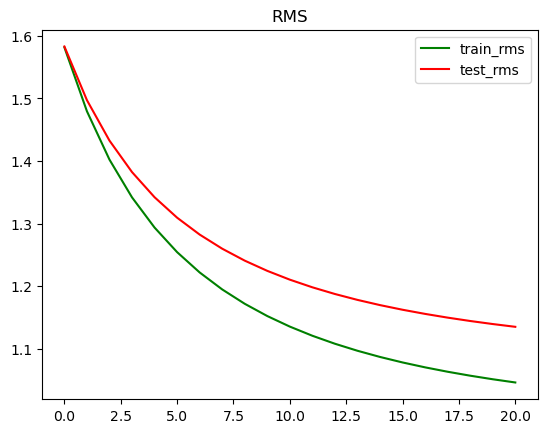

In [194]:
plt.plot(train_rmse_vector, color='g', label="train_rms")
plt.plot(test_rmse_vector, color='r', label="test_rms")
plt.title("RMS")
plt.legend()
plt.show()

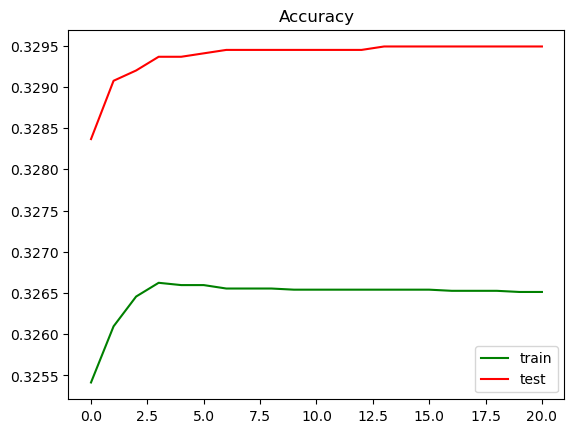

In [193]:
# Lambda = 0.1a

plt.plot(train_accuracy_vector, color='g', label="train")
plt.plot(test_accuracy_vector, color='r', label="test")
plt.title("Accuracy")
plt.legend()
plt.show()

Otro enfoque
(basado en https://www.kaggle.com/code/darpan25bajaj/movie-recommendation-system )
para recomendar películas según las que vieron

In [126]:
# creating pivot table to create item by item collaborative filtering
movie_rating_pivot = pd.pivot_table(index='userId',columns='movieTitle',values='rating',data=movie_rating)

In [127]:
movie_rating_pivot.head()

movieTitle,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


### Las del dataset de test.csv que tienen rating 0 son las que tengo que predecir

In [573]:
R_test

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [574]:
train_accuracy_vector[-1]

0.33557333333333333

In [575]:
test_accuracy_vector[-1]

0.33308

---------------

In [196]:
test_data = pd.read_csv('test.csv', sep=',') # final test

In [197]:
test_data.head()

,Id,userId,movieId,rating
0,0,1,6,3
1,1,1,10,3
2,2,1,12,3
3,3,1,14,2
4,4,1,17,4


In [198]:
# Todas las peliculas que el usuario 1 califico

test_data[test_data['userId'] == 1]

,Id,userId,movieId,rating
0,0,1,6,3
1,1,1,10,3
2,2,1,12,3
3,3,1,14,2
4,4,1,17,4
...,...,...,...,...
132,132,1,264,4
133,133,1,265,2
134,134,1,266,3
135,135,1,267,1


This data set consists of:
	
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	
	* Each user has rated at least 20 movies. 
 
        * Simple demographic info for the users (age, gender, occupation, zip)

In [199]:
idx_predicted = test_data[test_data['rating'] == 0].index
print(idx_predicted)

Index([   17,    20,    25,    26,    28,    29,    34,    36,    42,    44,
       ...
       19964, 19965, 19969, 19976, 19977, 19988, 19995, 19996, 19998, 19999],
      dtype='int64', length=4042)


In [200]:
#entonces las que tengo que predecir (no se reasigna el data frame, luego se filtra)
test_data[test_data['rating'] == 0]

,Id,userId,movieId,rating
17,17,1,53,0
20,20,1,60,0
25,25,1,67,0
26,26,1,69,0
28,28,1,72,0
...,...,...,...,...
19988,19988,457,366,0
19995,19995,458,648,0
19996,19996,458,1101,0
19998,19998,460,10,0


Evalución (RMSE o Accuracy en testing)
- Se deja un conjunto de calificaciones en test
- Una vez entrenado el modelo se evalúan los resultados en test
- Si son ratings entre 1 y 5 por ejemplo, se puede calcular el RMSE sobre
todas las películas que se hayan votado en test
- Si son likes, se podrían ver que porcentaje de las “likeadas” tiene
probabilidad alta de ser likeada (Definir umbral)

In [201]:
import numpy as np

min_c=1 #mínima calificación posible
max_c=5 #máxima
print( np.clip( np.round(0.2),min_c,max_c) )
print( np.clip( np.round(1.3),min_c,max_c) )
print( np.clip( np.round(1.7),min_c,max_c) )
print( np.clip( np.round(5.2),min_c,max_c) )
print( np.clip( np.round(4.2),min_c,max_c) )

1.0
1.0
2.0
5.0
4.0


In [ ]:
# Importante: si predigo todos los valores y la clasificación de kaggle da mejor el RMSE

In [202]:
# esto se tiene que poder resolver aplicando una función tipo lambda a test_data[test_data['rating'] == 0] 
# TODO: hacerlo más eficiente
for index, row in test_data.iterrows():
    # print(index, row['rating'])
    # if row['rating']==0:
    if 1: #estimo todos los valores
        # row['rating'] = 4 # predicted 
        user = row['userId']
        movie_item = row['movieId']
        prediction = estimate_rates(mu, bu[user], bi[movie_item], P=P[:,user], Q=Q[:,movie_item])
        #warning si redondeo y da 0.3, deberia ser 1 que es el mínimo por eso también clippeo
        row['rating'] = np.clip( np.round(prediction),min_c,max_c) # redondeo porque los ratings son de 1 al 5 a
        print("Prediction: ", prediction, " - Final: ", row['rating']) 

Prediction:  [3.7626164]  - Final:  4
Prediction:  [3.76120106]  - Final:  4
Prediction:  [3.91084316]  - Final:  4
Prediction:  [3.82805178]  - Final:  4
Prediction:  [2.20225787]  - Final:  2
Prediction:  [3.77324296]  - Final:  4
Prediction:  [2.86097276]  - Final:  3
Prediction:  [3.4712998]  - Final:  3
Prediction:  [4.39330543]  - Final:  4
Prediction:  [4.43759504]  - Final:  4
Prediction:  [4.28820314]  - Final:  4
Prediction:  [2.52195726]  - Final:  3
Prediction:  [3.10647343]  - Final:  3
Prediction:  [3.70523985]  - Final:  4
Prediction:  [4.32018403]  - Final:  4
Prediction:  [4.18246668]  - Final:  4
Prediction:  [3.36557277]  - Final:  3
Prediction:  [3.90451767]  - Final:  4
Prediction:  [2.73916983]  - Final:  3
Prediction:  [4.29314231]  - Final:  4
Prediction:  [5.39439863]  - Final:  5
Prediction:  [2.58807565]  - Final:  3
Prediction:  [3.16994742]  - Final:  3
Prediction:  [4.19321733]  - Final:  4
Prediction:  [4.84392369]  - Final:  5
Prediction:  [3.10466595]  

Your submission should be a CSV file with 20000 rows and a header. You can upload a zip/gz/7z archive.

In [206]:
test_data.to_csv('test-with-predicted-v3.csv', index=False) # ya tiene una columna índice, no agregar otra

In [204]:
test_data[test_data['rating'] == 0].head()

,Id,userId,movieId,rating


In [205]:
test_data.loc[idx_predicted].head()

,Id,userId,movieId,rating
17,17,1,53,4
20,20,1,60,5
25,25,1,67,3
26,26,1,69,4
28,28,1,72,3
